In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


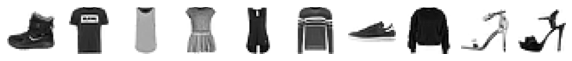

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [8]:
print(train_scaled.shape)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [10]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size = 0.2,
                                                                      random_state = 42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [11]:
# 밀집층(밀집층 뉴런 수, 출력 함수, 입력 크기)
dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,))

In [12]:
# 신경망 모델 만들기
model = keras.Sequential(dense)

In [13]:
# 모델 설정 단계 - 손실함수의 종류 설정
model.compile(loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [14]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [15]:
# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6078 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4792 - accuracy: 0.8398
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4555 - accuracy: 0.8479
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4441 - accuracy: 0.8525: 0s - loss: 0.4458 
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4373 - accuracy: 0.8559


In [16]:
# 모델 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4553 - accuracy: 0.8497


[0.455265611410141, 0.8497499823570251]

---

In [17]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [18]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                     test_size = 0.2,
                                                                     random_state = 42)

In [19]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [20]:
model = keras.Sequential([dense1, dense2])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape = (784,),
                      name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MNIST 모델')

In [24]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5632 - accuracy: 0.8087
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4097 - accuracy: 0.8534
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3745 - accuracy: 0.8657
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3510 - accuracy: 0.8723
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3341 - accuracy: 0.8794


In [30]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [32]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, 
                                                                      test_size = 0.2, random_state = 42)

In [34]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5357 - accuracy: 0.8125
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3984 - accuracy: 0.8577
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3562 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3342 - accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3186 - accuracy: 0.8865


In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8727


[0.3751370906829834, 0.8726666569709778]

In [36]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# sgd = keras.optimizers.SGD()
# model.compile(optimizer=sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [37]:
sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [38]:
# 네스테로프 모멘텀 = 모멘텀 최적화를 2번 반복
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [39]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [41]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [42]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(19, activation='softmax'))

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5366 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8561
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3593 - accuracy: 0.8701
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3311 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8860


In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8673


[0.3582049012184143, 0.8673333525657654]

---

In [45]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target,
                                                                      test_size = 0.2, random_state = 42)

In [48]:
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [49]:
model = model_fn()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [51]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


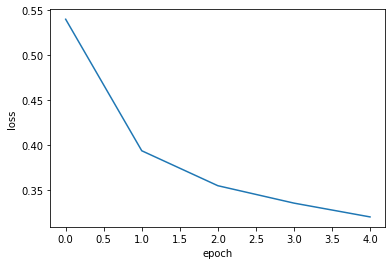

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

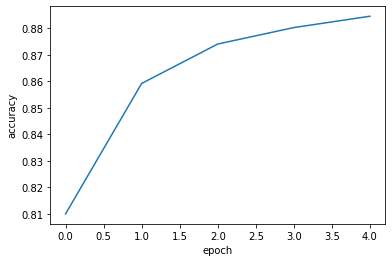

In [53]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

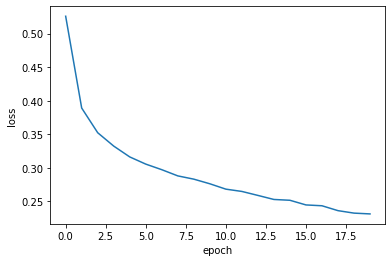

In [54]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [58]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data=(val_scaled, val_target))

In [59]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


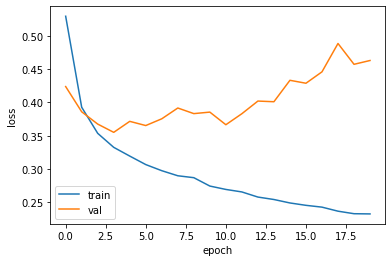

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

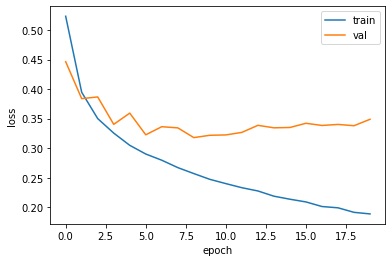

In [62]:
model = model_fn()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                   validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [63]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


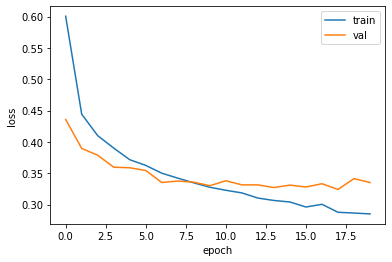

In [64]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                   validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose = 0,
                   validation_data = (val_scaled, val_target))

In [67]:
model.save_weights('model-weight.h5')

In [68]:
model.save('model-whole.h5')

In [70]:
ls -al *.h5

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7061-1261

 C:\Users\USER\Python_Practices\Hon_gong 디렉터리


 C:\Users\USER\Python_Practices\Hon_gong 디렉터리

2021-08-01  오전 12:39           332,480 model-weight.h5
2021-08-01  오전 12:39           981,776 model-whole.h5
               2개 파일           1,314,256 바이트
               0개 디렉터리  421,362,221,056 바이트 남음


In [72]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [75]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8784166666666666


In [76]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3332 - accuracy: 0.8784


[0.33317235112190247, 0.8784166574478149]

In [77]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose = 0,
         validation_data = (val_scaled, val_target),
         callbacks=[checkpoint_cb])

In [79]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8863


[0.3319476842880249, 0.8863333463668823]

In [80]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose = 0,
                   validation_data = (val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

In [81]:
print(early_stopping_cb.stopped_epoch)

9


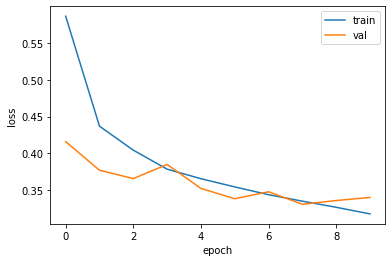

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [83]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3307 - accuracy: 0.8795


[0.3306851089000702, 0.8794999718666077]